In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

#### Exploratory Data Analysis

In [2]:
columns = ['id','clumb thickness','UCell Size','UCell Shape','Marginal Adhesion','SCell Size',
           'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

data = pd.read_csv('cancer.data',names=columns)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clumb thickness    699 non-null    int64 
 2   UCell Size         699 non-null    int64 
 3   UCell Shape        699 non-null    int64 
 4   Marginal Adhesion  699 non-null    int64 
 5   SCell Size         699 non-null    int64 
 6   Bare Nuclei        699 non-null    object
 7   Bland Chromatin    699 non-null    int64 
 8   Normal Nucleoli    699 non-null    int64 
 9   Mitoses            699 non-null    int64 
 10  Class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


### Attribute Information for Data:

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

In [3]:
data['Bare Nuclei'] = data['Bare Nuclei'].apply(lambda x: float(x) if x!='?' else None)

In [4]:
data=data.dropna().reset_index(drop=True)
data=data.drop(['id'],axis=1)

#### Train Test Split 

In [5]:
X = data.drop('Class',axis=1).values
y = data['Class'].values

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

#### Decide K the number of nearest neighbors
 

In [7]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

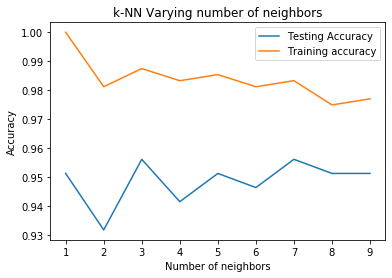

In [8]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [9]:
#Check neighbors with GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
print('The best n neighbor is ' + str(model.best_params_['n_neighbors']) + '.')

The best n neighbor is 3.


#### Setup a knn classifier with 3 neighbors

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

#### Calculate Confision Matrix

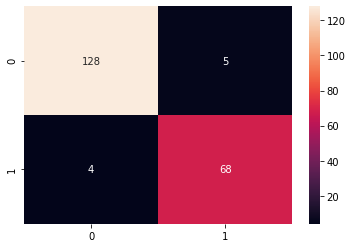

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [12]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  128
False Positives:  5
False Negatives:  4
True Positives:  68


#### Check accuracy

In [13]:
accuracy=knn.score(X_test,y_test)
print('k-NN accuracy of our model is equal %' + str(round(accuracy, 2)*100) + '.')

k-NN accuracy of our model is equal %96.0.


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.97      0.96      0.97       133
           4       0.93      0.94      0.94        72

    accuracy                           0.96       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205

